# Practical Question 01

### Installing requirements
We need to have `pillow` package for processing image.

In [2]:
!pip install pillow

In [3]:
from PIL import Image

### Defining `get_image_bits` functions
This functions is gonna return the bits-per-pixel.

In [16]:
def get_image_bits(image_path):
    try:
        # Open the image
        img = Image.open(image_path)

        # Get the number of bits per pixel
        mode  = img.mode

        bits_per_pixel = len(mode) * 8

        return bits_per_pixel

    except FileNotFoundError:
        print(f"Error: The file at '{image_path}' was not found.")
        return None

Now we can get the image bits-per-pixel

In [17]:
image_path = "../../campusdrive.png"

bits = get_image_bits(image_path)
print(f"The image at {image_path} has {bits} bits per pixel.")

The image at ../../campusdrive.png has 8 bits per pixel.


### Bit-Per-Pixel Reduction
Now we can define a function to reduce the bit-per-pixel rate for an image.

In [29]:
import os

def reduce_bits_and_save(input_path, output_folder, start_bits=8, end_bits=1):
  try:
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Open the original image
    original_img = Image.open(input_path)

    # Convert to grayscale ("L" mode)
    original_img = original_img.convert("L")

    # Iterate over the desired bit depths
    for target_bits in range(start_bits, end_bits - 1, -1):
      # Create a new image with the specified bit depth
      reduced_img = Image.new("L", original_img.size)

      # Extract the desired bits from each pixel
      for x in range(original_img.width):
        for y in range(original_img.height):
          pixel_value = original_img.getpixel((x, y))
          reduced_pixel_value = pixel_value & ((1 << target_bits) - 1)
          reduced_img.putpixel((x, y), reduced_pixel_value)

      # Save the reduced-bit image
      output_path = os.path.join(output_folder, f"{os.path.basename(input_path).split('.')[0]}_{target_bits}bits.png")
      reduced_img.save(output_path)

    return original_img, output_folder, start_bits, end_bits

  except FileNotFoundError:
      print(f"Error: The file at '{input_path}' was not found.")
  except Exception as e:
      print(f"Error processing the image: {str(e)}")


In [31]:

input_image_path = "../../campusdrive.png"
output_folder_path = "image-reduction-results"
start_bits = 8  # Set the starting bit depth
end_bits = 1    # Set the ending bit depth

reduce_bits_and_save(input_image_path, output_folder_path, start_bits, end_bits)

### The Result

In [48]:
import matplotlib.pyplot as plt

def show_images(folder_path, num_images=8):
    # Get a list of all files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Choose the number of images you want to display
    num_images = min(len(image_files), num_images)
    
    # Reverse the order of the images
    image_files = image_files[::-1]

    # Create a 2x4 grid for displaying the images
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))

    # Flatten the 2D array of subplots for easier indexing
    axes = axes.flatten()

    # Loop through the images and display them in the subplots
    for i in range(num_images):
        image_path = os.path.join(folder_path, image_files[i])
        img = Image.open(image_path)

        axes[i].imshow(img, cmap='gray')  # Display in grayscale
        axes[i].axis('off')  # Turn off axis labels for cleaner display

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

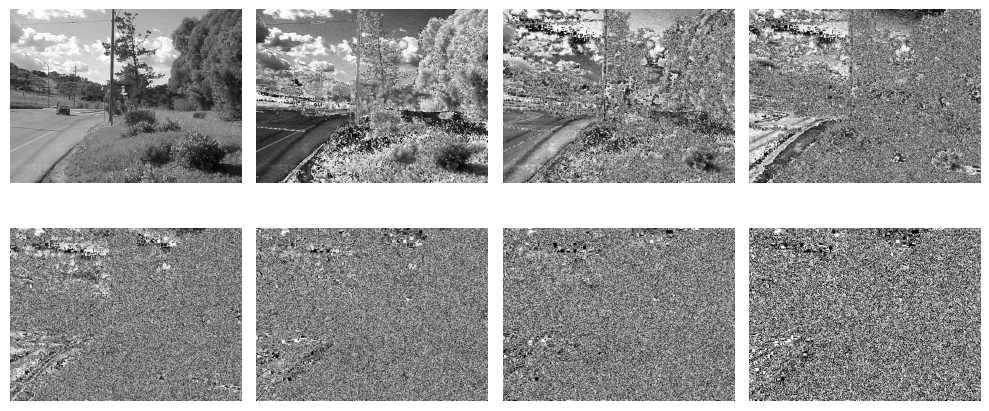

In [49]:
folder_path = "image-reduction-results"
show_images(folder_path)